A.  Exploratory Data Analysis
1. Load the datset
2. Make a scatter plot
3. Compute basic statistics for each column

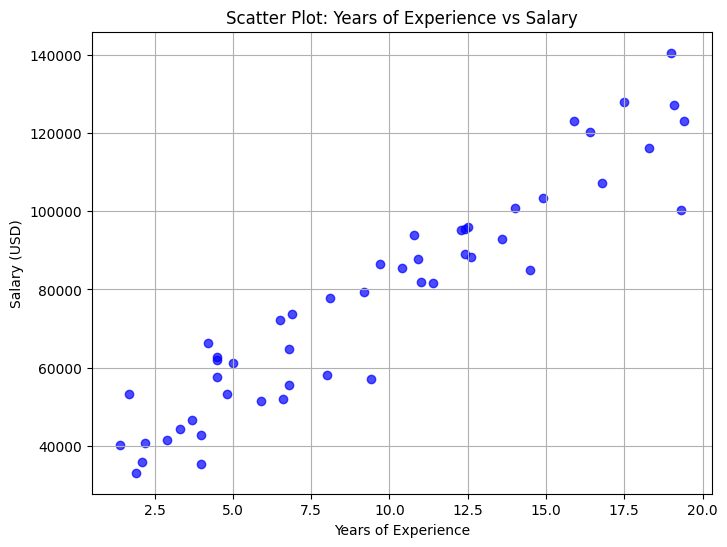

{'YearsExperience': {'Mean': 9.48,
  'Median': 9.3,
  'Variance': 30.09061224489795},
 'Salary': {'Mean': 77370.5474,
  'Median': 78598.65,
  'Variance': 800829123.3381461}}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics


data = pd.read_csv("extended_salary_data.csv")

# Basic statistics for each column
statistics = {
    "YearsExperience": {
        "Mean": np.mean(data["YearsExperience"]),
        "Median": np.median(data["YearsExperience"]),
        "Variance": np.var(data["YearsExperience"], ddof=1)
    },
    "Salary": {
        "Mean": np.mean(data["Salary"]),
        "Median": np.median(data["Salary"]),
        "Variance": np.var(data["Salary"], ddof=1)
    }
}

# Visualize the data with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data["YearsExperience"], data["Salary"], color="blue", alpha=0.7)
plt.title("Scatter Plot: Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.grid(True)
plt.show()

statistics


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving extended_salary_data.csv to extended_salary_data.csv


B. Build a linear regression model
1. Split the data into training and testing
2. Train a linear regtression model on the training set  
3. Obtain the coefficients of the linear model slope and intercept

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.read_csv("extended_salary_data.csv")

print(data.head())
X = data[["YearsExperience"]]  # Feature
y = data["Salary"]             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (Coefficient):", slope)
print("Intercept:", intercept)
y_pred = model.predict(X_test)

print("Predicted Salaries:", y_pred)

   YearsExperience     Salary
0              8.1   77884.67
1             19.1  127213.68
2             14.9  103343.52
3             12.4   88988.96
4              4.0   35214.78
Slope (Coefficient): 4854.184972065953
Intercept: 31387.443404060636
Predicted Salaries: [ 55658.36826439  77016.78214148  92064.75555489  97404.35902416
  84783.47809679  86725.15208561  54687.53126998 108568.98445991
  42066.65034261  62939.64572249]


C. Evaluate the model
1. Use the model to make predictions o the testing set.
2. Calculate the evaluation metrics-
1 Mean absolute error(MAE)
2 Mean Squared Error
3. Plot the regression line over the scatter plot of the data


Mean Absolute Error (MAE): 6836.210895894568
Mean Squared Error (MSE): 79580620.27310547


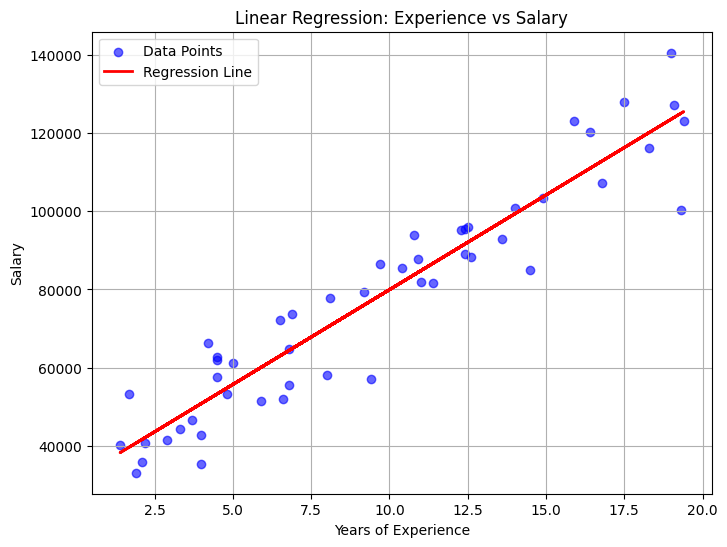

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv("extended_salary_data.csv")

X = data[["YearsExperience"]]
y = data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.6)
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.title("Linear Regression: Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


BONUS TASK
Extend the dataset by introducing a synthetic feature, "Number of Projects Completed," and use it alongside "Years of Experience" to build a multiple linear regression model. Compare its performance with the simple linear regression model.
Steps
1. Add a new feature, `NumProjectsCompleted`, loosely correlated with `YearsExperience`.
2. Train a multiple linear regression model with both features (`YearsExperience` and `NumProjectsCompleted`) as inputs and `Salary` as the target.